<a href="https://colab.research.google.com/github/kilinandrea/mock_mabs/blob/main/MOCK_MABS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# Create a dictionary with the data
data = {
    'Experiment': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Ligand Density (mol/m^2)': [200, 250, 180, 220, 240, 200, 230, 210, 220, 190],
    'Pore Size (nm)': [50, 60, 55, 65, 50, 60, 55, 70, 60, 50],
    'pH': [7, 7, 8, 7, 8, 8, 7, 8, 8, 7],
    'Salt Concentration (mM)': [100, 150, 120, 100, 150, 120, 130, 140, 110, 140],
    'Binding Capacity (mg/mL)': [10, 12, 9.5, 11, 11.5, 10.5, 10.8, 11.2, 10.2, 9.8],
    'Selectivity': [0.85, 0.88, 0.82, 0.86, 0.87, 0.84, 0.85, 0.87, 0.83, 0.81],
    'Purification Efficiency (%)': [90, 92, 88, 91, 92, 89, 91, 90, 88, 87]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


   Experiment  Ligand Density (mol/m^2)  Pore Size (nm)  pH  \
0           1                       200              50   7   
1           2                       250              60   7   
2           3                       180              55   8   
3           4                       220              65   7   
4           5                       240              50   8   
5           6                       200              60   8   
6           7                       230              55   7   
7           8                       210              70   8   
8           9                       220              60   8   
9          10                       190              50   7   

   Salt Concentration (mM)  Binding Capacity (mg/mL)  Selectivity  \
0                      100                      10.0         0.85   
1                      150                      12.0         0.88   
2                      120                       9.5         0.82   
3                      100    

If we only had one attribute to evaluate, we could use Pearson correlation coefficient for each performance indicator.

Example:

In [3]:
from scipy.stats import pearsonr

# Statistical analysis: Pearson correlation coefficient for Binding capacity
correlation_coefficient, p_value = pearsonr(df['Ligand Density (mol/m^2)'], df['Binding Capacity (mg/mL)'])
print(f"Pearson correlation coefficient for Ligand Density (mol/m^2): {correlation_coefficient}, p-value: {p_value}")

correlation_coefficient, p_value = pearsonr(df['Pore Size (nm)'], df['Binding Capacity (mg/mL)'])
print(f"Pearson correlation coefficient for Pore Size (nm): {correlation_coefficient}, p-value: {p_value}")

correlation_coefficient, p_value = pearsonr(df['pH'], df['Binding Capacity (mg/mL)'])
print(f"Pearson correlation coefficient for pH: {correlation_coefficient}, p-value: {p_value}")

correlation_coefficient, p_value = pearsonr(df['Salt Concentration (mM)'], df['Binding Capacity (mg/mL)'])
print(f"Pearson correlation coefficient for Salt Concentration (mM): {correlation_coefficient}, p-value: {p_value}")




Pearson correlation coefficient for Ligand Density (mol/m^2): 0.8874878029018246, p-value: 0.0006108026171956078
Pearson correlation coefficient for Pore Size (nm): 0.3871899366120872, p-value: 0.268983877124663
Pearson correlation coefficient for pH: -0.0928395027074834, p-value: 0.7986549909866878
Pearson correlation coefficient for Salt Concentration (mM): 0.53051144404276, p-value: 0.11466070187830303


Similarly, we could vizualize it as a scatterplot such as:

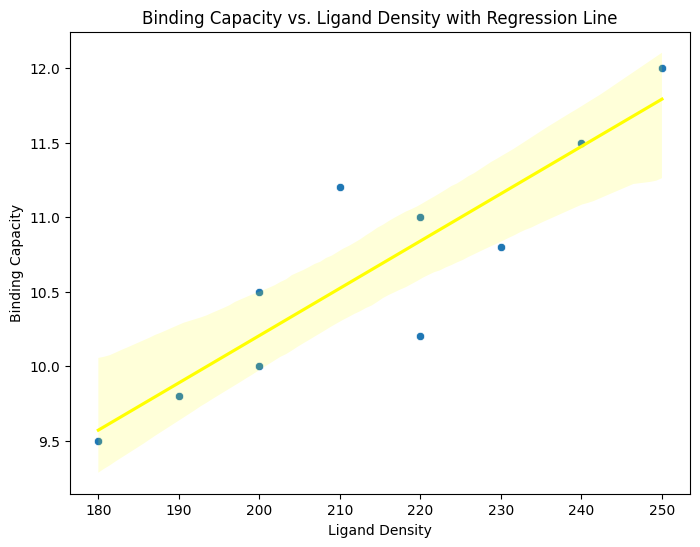

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA: Scatter plot of binding capacity vs. ligand density
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ligand Density (mol/m^2)', y='Binding Capacity (mg/mL)', data=df)
sns.regplot(x='Ligand Density (mol/m^2)', y='Binding Capacity (mg/mL)', data=df, scatter=False, color='yellow')  # Add regression line
plt.xlabel('Ligand Density')
plt.ylabel('Binding Capacity')
plt.title('Binding Capacity vs. Ligand Density with Regression Line')
plt.show()


However, we have four attributes to find the relationship to three performance indicators. All attributes are continuous predictors, so we will use the OLS regression test.

**PERFORMANCE INDICATOR: BINDING CAPACITY (mg/mL)**

In [5]:
import statsmodels.api as sm
import numpy as np

# Define independent variables (excluding constant)
X = df[['Ligand Density (mol/m^2)', 'Pore Size (nm)', 'pH', 'Salt Concentration (mM)']]

# Add constant term
X = sm.add_constant(X)

# Define dependent variable
y = df['Binding Capacity (mg/mL)']

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     Binding Capacity (mg/mL)   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.837
Method:                       Least Squares   F-statistic:                     12.52
Date:                      Sat, 06 Apr 2024   Prob (F-statistic):            0.00813
Time:                              18:28:07   Log-Likelihood:                0.63045
No. Observations:                        10   AIC:                             8.739
Df Residuals:                             5   BIC:                             10.25
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Bases on the OLS results, we can remove two predictors as their p-values are above 0.05.  The ones we discard are pH levels and salt concentration.

In [6]:
# Define independent variables (excluding constant)
X = df[['Ligand Density (mol/m^2)', 'Pore Size (nm)']]

# Add constant term
X = sm.add_constant(X)

# Define dependent variable
y = df['Binding Capacity (mg/mL)']

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Binding Capacity (mg/mL)   R-squared:                       0.855
Model:                                  OLS   Adj. R-squared:                  0.813
Method:                       Least Squares   F-statistic:                     20.58
Date:                      Sat, 06 Apr 2024   Prob (F-statistic):            0.00117
Time:                              18:28:12   Log-Likelihood:                -1.7225
No. Observations:                        10   AIC:                             9.445
Df Residuals:                             7   BIC:                             10.35
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In this new combination, we observe that really only **ligand density** has a statistically relevant impact on binding capacity:
R squared is 0.855 which shows this model as a **good fit**, while F's p-value is 0.00117, less than 0.05 so we know this is **statistically relevant with 95% confidence.**

Let's see what these look like:


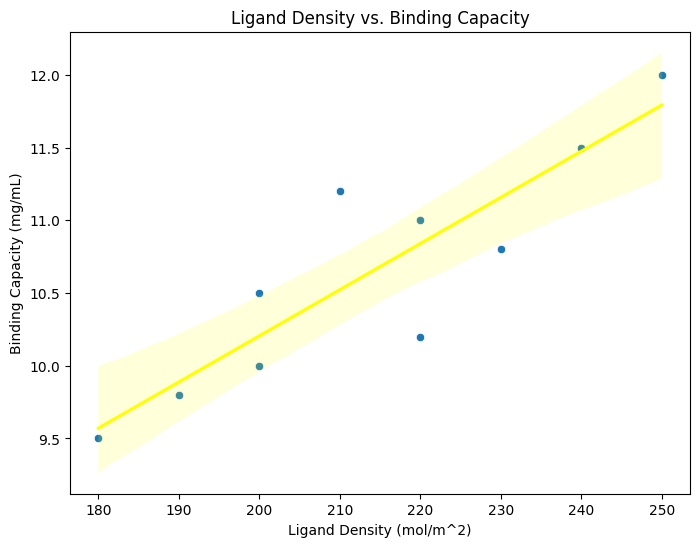

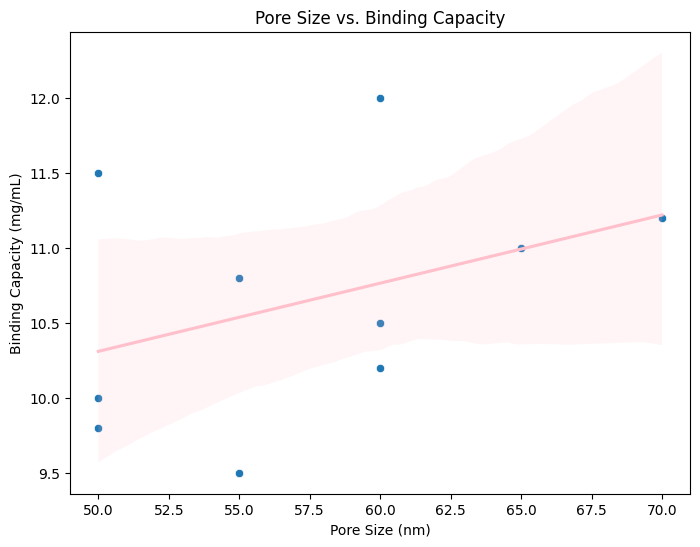

In [15]:
# Scatter plot of Ligand Density vs. Binding Capacity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ligand Density (mol/m^2)', y='Binding Capacity (mg/mL)', data=df)
sns.regplot(x='Ligand Density (mol/m^2)', y='Binding Capacity (mg/mL)', data=df, scatter=False, color='yellow')
plt.title('Ligand Density vs. Binding Capacity')
plt.xlabel('Ligand Density (mol/m^2)')
plt.ylabel('Binding Capacity (mg/mL)')
plt.show()

# Scatter plot of Pore Size vs. Binding Capacity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pore Size (nm)', y='Binding Capacity (mg/mL)', data=df)
sns.regplot(x='Pore Size (nm)', y='Binding Capacity (mg/mL)', data=df, scatter=False, color='pink')
plt.title('Pore Size vs. Binding Capacity')
plt.xlabel('Pore Size (nm)')
plt.ylabel('Binding Capacity (mg/mL)')
plt.show()


**PERFORMANCE INDICATOR: SELECTIVITY**

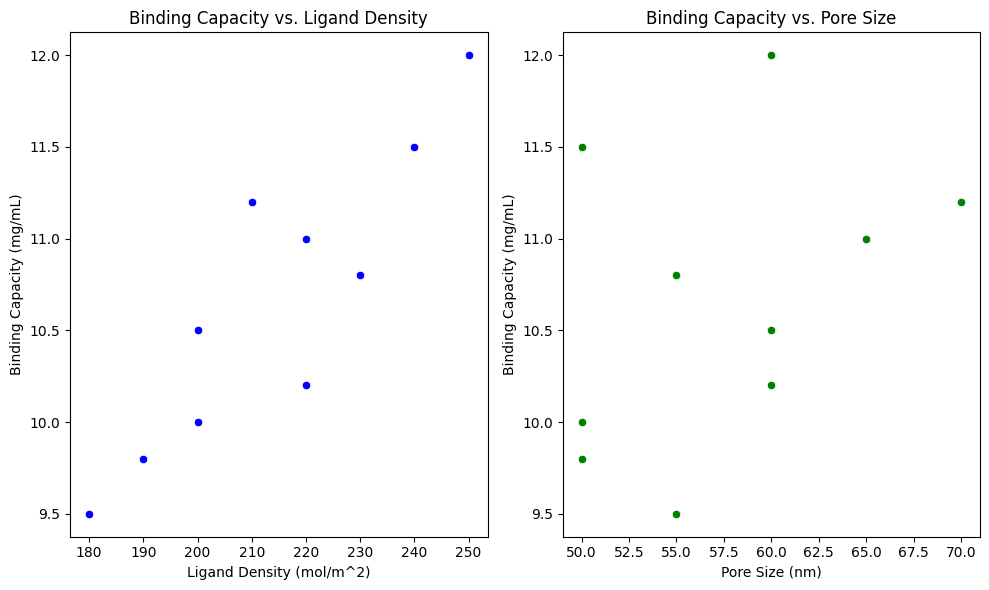

In [22]:
# Define independent variables
X1 = df['Ligand Density (mol/m^2)']
X2 = df['Pore Size (nm)']

# Define dependent variable
y = df['Binding Capacity (mg/mL)']

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for Ligand Density
plt.subplot(1, 2, 1)
sns.scatterplot(x=X1, y=y, color='blue')
plt.title('Binding Capacity vs. Ligand Density')
plt.xlabel('Ligand Density (mol/m^2)')
plt.ylabel('Binding Capacity (mg/mL)')

# Scatter plot for Pore Size
plt.subplot(1, 2, 2)
sns.scatterplot(x=X2, y=y, color='green')
plt.title('Binding Capacity vs. Pore Size')
plt.xlabel('Pore Size (nm)')
plt.ylabel('Binding Capacity (mg/mL)')

plt.tight_layout()
plt.show()

In [8]:

# Define independent variables (excluding constant)
X = df[['Ligand Density (mol/m^2)', 'Pore Size (nm)', 'pH', 'Salt Concentration (mM)']]

# Add constant term
X = sm.add_constant(X)

# Define dependent variable
y = df['Selectivity']

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Selectivity   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     2.747
Date:                Sat, 06 Apr 2024   Prob (F-statistic):              0.149
Time:                        18:34:12   Log-Likelihood:                 29.873
No. Observations:                  10   AIC:                            -49.75
Df Residuals:                       5   BIC:                            -48.23
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Only statistically relevant factor to impact selectivity is Ligand Density:

In [17]:


# Define independent variables (excluding constant)
X = df[['Ligand Density (mol/m^2)']]

# Add constant term
X = sm.add_constant(X)

# Define dependent variable
y = df['Selectivity']

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Selectivity   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     12.33
Date:                Sat, 06 Apr 2024   Prob (F-statistic):            0.00795
Time:                        18:43:36   Log-Likelihood:                 28.723
No. Observations:                  10   AIC:                            -53.45
Df Residuals:                       8   BIC:                            -52.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


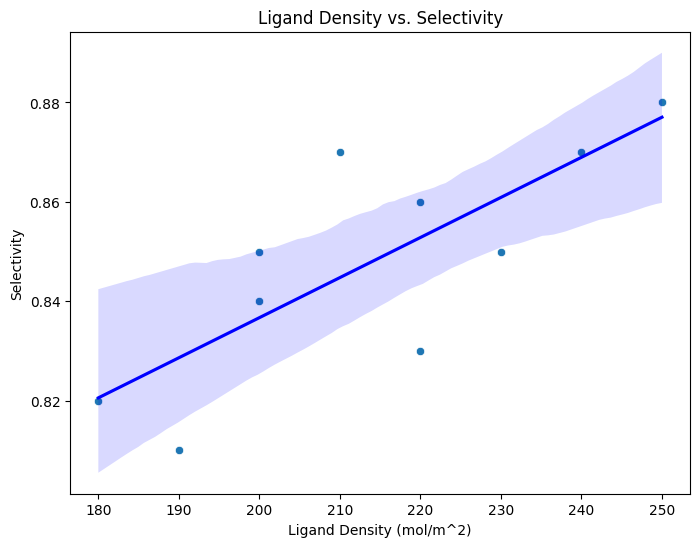

In [20]:
# Scatter plot of Ligand Density vs. Selectivity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ligand Density (mol/m^2)', y='Selectivity', data=df)
sns.regplot(x='Ligand Density (mol/m^2)', y='Selectivity', data=df, scatter=False, color='blue')
plt.title('Ligand Density vs. Selectivity')
plt.xlabel('Ligand Density (mol/m^2)')
plt.ylabel('Selectivity')
plt.show()

**PERFORMANCE INDICATOR: PURIFICATION EFFICIENCY**

In [10]:

# Define independent variables (excluding constant)
X = df[['Ligand Density (mol/m^2)', 'Pore Size (nm)', 'pH', 'Salt Concentration (mM)']]

# Add constant term
X = sm.add_constant(X)

# Define dependent variable
y = df['Purification Efficiency (%)']

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Purification Efficiency (%)   R-squared:                       0.688
Model:                                     OLS   Adj. R-squared:                  0.439
Method:                          Least Squares   F-statistic:                     2.759
Date:                         Sat, 06 Apr 2024   Prob (F-statistic):              0.148
Time:                                 18:36:15   Log-Likelihood:                -13.439
No. Observations:                           10   AIC:                             36.88
Df Residuals:                                5   BIC:                             38.39
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Only statistically relevant impacting factor is, again, Ligand Density. Therefore:

In [11]:
# Define independent variables (excluding constant)
X = df[['Ligand Density (mol/m^2)']]

# Add constant term
X = sm.add_constant(X)

# Define dependent variable
y = df['Purification Efficiency (%)']

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Purification Efficiency (%)   R-squared:                       0.677
Model:                                     OLS   Adj. R-squared:                  0.636
Method:                          Least Squares   F-statistic:                     16.76
Date:                         Sat, 06 Apr 2024   Prob (F-statistic):            0.00347
Time:                                 18:37:36   Log-Likelihood:                -13.617
No. Observations:                           10   AIC:                             31.23
Df Residuals:                                8   BIC:                             31.84
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


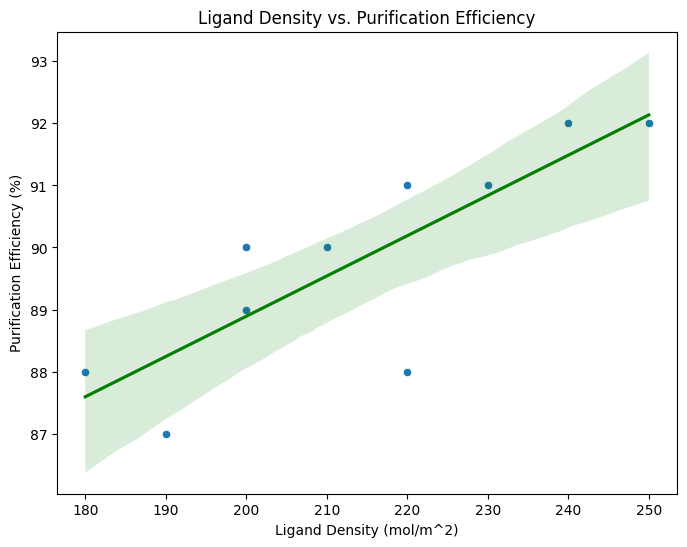

In [21]:
# Scatter plot of Ligand Density vs. Purification Efficiency
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ligand Density (mol/m^2)', y='Purification Efficiency (%)', data=df)
sns.regplot(x='Ligand Density (mol/m^2)', y='Purification Efficiency (%)', data=df, scatter=False, color='green')
plt.title('Ligand Density vs. Purification Efficiency')
plt.xlabel('Ligand Density (mol/m^2)')
plt.ylabel('Purification Efficiency (%)')
plt.show()

**PREDICTIVE MODELING**

Our sample size is quite small for a reliable predictive model, but let's go through the motions:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# FOR BINDING CAPACITY

# Step 1: Prepare the data
X = df[['Ligand Density (mol/m^2)', 'Pore Size (nm)']]
y = df['Binding Capacity (mg/mL)']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)




Mean Squared Error: 0.31614469565507014
R-squared: 0.6096979065986792


In [12]:
# for SELECTIVITY

# Step 1: Prepare the data
X = df[['Ligand Density (mol/m^2)']]
y = df['Binding Capacity (mg/mL)']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)




Mean Squared Error: 0.2524751222803183
R-squared: 0.6883023181724468


In [13]:
# FOR PURIFICATION EFFICIENCY

# Step 1: Prepare the data
X = df[['Ligand Density (mol/m^2)']]
y = df['Purification Efficiency (%)']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)




Mean Squared Error: 3.7405970652723797
R-squared: 0.06485073368190508
